In [111]:
# 3.2 Exercise: Preparing for Exploratory Data Analysis Using Python

In [112]:
# Exercise 1: Page 11: 1-1
# Execute existing cells and solve exercise as directed.

In [202]:
import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")
import nsfg

In [204]:
preg = nsfg.ReadFemPreg()
preg.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


Print the column names.

In [205]:
preg.columns

Index(['caseid', 'pregordr', 'howpreg_n', 'howpreg_p', 'moscurrp', 'nowprgdk',
       'pregend1', 'pregend2', 'nbrnaliv', 'multbrth',
       ...
       'laborfor_i', 'religion_i', 'metro_i', 'basewgt', 'adj_mod_basewgt',
       'finalwgt', 'secu_p', 'sest', 'cmintvw', 'totalwgt_lb'],
      dtype='object', length=244)

Select a single column name.

In [206]:
preg.columns[1]

'pregordr'

Select a column and check what type it is.

In [120]:
pregordr = preg['pregordr']
type(pregordr)

pandas.core.series.Series

Print a column.

In [122]:
pregordr

0        1
1        2
2        1
3        2
4        3
        ..
13588    1
13589    2
13590    3
13591    4
13592    5
Name: pregordr, Length: 13593, dtype: int64

Select a single element from a column.

In [124]:
pregordr[0]

1

Select a slice from a column.

In [126]:
pregordr[2:5]

2    1
3    2
4    3
Name: pregordr, dtype: int64

Select a column using dot notation.

In [128]:
pregordr = preg.pregordr

Count the number of times each value occurs.

In [130]:
preg.outcome.value_counts().sort_index()

outcome
1    9148
2    1862
3     120
4    1921
5     190
6     352
Name: count, dtype: int64

Check the values of another variable.

In [132]:
preg.birthwgt_lb.value_counts().sort_index()

birthwgt_lb
0.0        8
1.0       40
2.0       53
3.0       98
4.0      229
5.0      697
6.0     2223
7.0     3049
8.0     1889
9.0      623
10.0     132
11.0      26
12.0      10
13.0       3
14.0       3
15.0       1
Name: count, dtype: int64

Make a dictionary that maps from each respondent's `caseid` to a list of indices into the pregnancy `DataFrame`.  Use it to select the pregnancy outcomes for a single respondent.

In [134]:
caseid = 10229
preg_map = nsfg.MakePregMap(preg)

#jyoti

indices = preg_map[caseid]
preg.outcome[indices].values




array([4, 4, 4, 4, 4, 4, 1], dtype=int64)

## Exercises

Select the `birthord` column, print the value counts, and compare to results published in the [codebook](https://ftp.cdc.gov/pub/Health_Statistics/NCHS/Dataset_Documentation/NSFG/Cycle6Codebook-Pregnancy.pdf)

In [137]:
birthord = preg['birthord']
birthord

0        1.0
1        2.0
2        1.0
3        2.0
4        3.0
        ... 
13588    1.0
13589    NaN
13590    NaN
13591    2.0
13592    3.0
Name: birthord, Length: 13593, dtype: float64

We can also use `isnull` to count the number of nans.

In [139]:
preg.birthord.isnull().sum()

4445

Select the `prglngth` column, print the value counts, and compare to results published in the [codebook](https://ftp.cdc.gov/pub/Health_Statistics/NCHS/Dataset_Documentation/NSFG/Cycle6Codebook-Pregnancy.pdf)

In [141]:
prglngth = preg['prglngth']
print(prglngth)
preg.prglngth.value_counts().sort_index()

0        39
1        39
2        39
3        39
4        39
         ..
13588    39
13589     6
13590     5
13591    39
13592    39
Name: prglngth, Length: 13593, dtype: int64


prglngth
0       15
1        9
2       78
3      151
4      412
5      181
6      543
7      175
8      409
9      594
10     137
11     202
12     170
13     446
14      29
15      39
16      44
17     253
18      17
19      34
20      18
21      37
22     147
23      12
24      31
25      15
26     117
27       8
28      38
29      23
30     198
31      29
32     122
33      50
34      60
35     357
36     329
37     457
38     609
39    4744
40    1120
41     591
42     328
43     148
44      46
45      10
46       1
47       1
48       7
50       2
Name: count, dtype: int64

To compute the mean of a column, you can invoke the `mean` method on a Series.  For example, here is the mean birthweight in pounds:

In [143]:
preg.totalwgt_lb.mean()

7.265628457623368

Create a new column named <tt>totalwgt_kg</tt> that contains birth weight in kilograms.  Compute its mean.  Remember that when you create a new column, you have to use dictionary syntax, not dot notation.

In [145]:
# homework
# convert totalwgt_lb to totalwgt_kg and create a ne column
preg['totalwgt_kg'] = preg.totalwgt_lb * 0.453592
preg.totalwgt_kg.mean()

3.2956309433502984

`nsfg.py` also provides `ReadFemResp`, which reads the female respondents file and returns a `DataFrame`:

In [147]:
resp = nsfg.ReadFemResp()

`DataFrame` provides a method `head` that displays the first five rows:

In [149]:
resp.head()

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667
1,5012,1,5,1,5,5.0,42,42,718,42,...,0,2335.279149,2846.799490,4744.191350,2,18,1233,1221,16:30:59,64.294000
2,11586,1,5,1,5,5.0,43,43,708,43,...,0,2335.279149,2846.799490,4744.191350,2,18,1234,1222,18:19:09,75.149167
3,6794,5,5,4,1,5.0,15,15,1042,15,...,0,3783.152221,5071.464231,5923.977368,2,18,1234,1222,15:54:43,28.642833
4,616,1,5,4,1,5.0,20,20,991,20,...,0,5341.329968,6437.335772,7229.128072,2,18,1233,1221,14:19:44,69.502667


Select the `age_r` column from `resp` and print the value counts.  How old are the youngest and oldest respondents?

In [151]:
# homework 
# Select the age_r column from resp and print the value counts
resp.age_r.value_counts().sort_index()

age_r
15    217
16    223
17    234
18    235
19    241
20    258
21    267
22    287
23    282
24    269
25    267
26    260
27    255
28    252
29    262
30    292
31    278
32    273
33    257
34    255
35    262
36    266
37    271
38    256
39    215
40    256
41    250
42    215
43    253
44    235
Name: count, dtype: int64

In [152]:
# From the above result, The youngest one is 15 year old and oldest one is 44

We can use the `caseid` to match up rows from `resp` and `preg`.  For example, we can select the row from `resp` for `caseid` 2298 like this:

In [154]:
resp[resp.caseid==2298]

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667


And we can get the corresponding rows from `preg` like this:

In [156]:
preg[preg.caseid==2298]

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb,totalwgt_kg
2610,2298,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,6.8750,3.118445
2611,2298,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,5.5000,2.494756
2612,2298,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,4.1875,1.899417
2613,2298,4,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,6.8750,3.118445


How old is the respondent with `caseid` 1?

In [158]:
#homework
# filter the age based on caseid == 1

resp[resp.caseid==1].age_r

1069    44
Name: age_r, dtype: int64

What are the pregnancy lengths for the respondent with `caseid` 2298?

In [160]:
#homework
# filter data based on caseid
preg[preg.caseid==2298].prglngth

2610    40
2611    36
2612    30
2613    40
Name: prglngth, dtype: int64

What was the birthweight of the first baby born to the respondent with `caseid` 5013?

In [162]:
# homework

# use `pregordr` to select the first baby

preg[(preg.caseid==5013) & (preg.pregordr==1)].birthwgt_lb

5516    7.0
Name: birthwgt_lb, dtype: float64

In [163]:
# # Exercise 2: Page 11: 1-2
# Find the value of pregnum

In [164]:

pregnum = preg.groupby('caseid').size()

# Display the first few rows
print(pregnum)

# Convert the result to a DataFrame
pregnancy_count_df = pregnum.reset_index(name='pregnum')

# Count how many respondents have the same pregnancy count
same_pregnancy_count = pregnancy_count_df['pregnum'].value_counts().reset_index()
same_pregnancy_count.columns = ['pregnum', 'respondent_count']

# Sort by pregnancy_count
same_pregnancy_count = same_pregnancy_count.sort_values(by='pregnum')
# Display the result
print(same_pregnancy_count)

caseid
1        2
2        3
6        3
7        2
12       1
        ..
12566    2
12568    3
12569    2
12570    3
12571    5
Length: 5033, dtype: int64
    pregnum  respondent_count
1         1              1267
0         2              1432
2         3              1110
3         4               611
4         5               305
5         6               150
6         7                80
7         8                40
8         9                21
9        10                 9
10       11                 3
11       12                 2
12       14                 2
13       19                 1


In [165]:
# To compare groups using summary statistics in Python, you can calculate descriptive statistics like 
#mean, median, standard deviation, count, etc., for each group. Using the pandas library, this can be done efficiently.

In [166]:
import numpy as np
# import math as math
import thinkstats2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
import thinkplot


In [167]:
# # Exercise 3: Page 25: 2-1
# Do first baby arrive late?

In [168]:
import nsfg

In [169]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

In [170]:
ages = np.floor(live.agepreg)

In [171]:
# As an exercise, plot the histogram of pregnancy lengths (column prglngth).

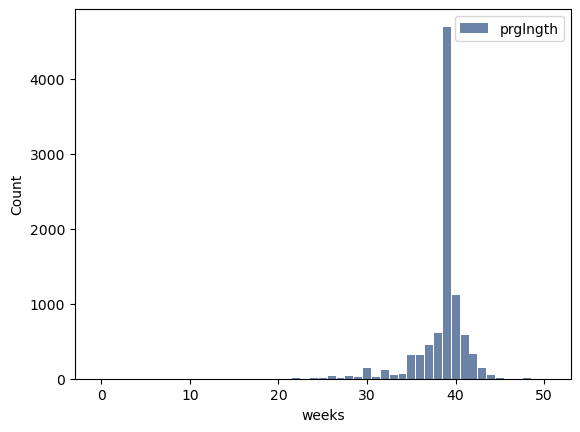

In [172]:
# Solution

hist = thinkstats2.Hist(live.prglngth, label='prglngth')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='weeks', ylabel='Count')

In [173]:
# From live births, we can select first babies and others using birthord,

# List item
# List item
# then compute histograms of pregnancy length for the two groups.

In [174]:
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

first_hist = thinkstats2.Hist(firsts.prglngth, label='first')
other_hist = thinkstats2.Hist(others.prglngth, label='other')

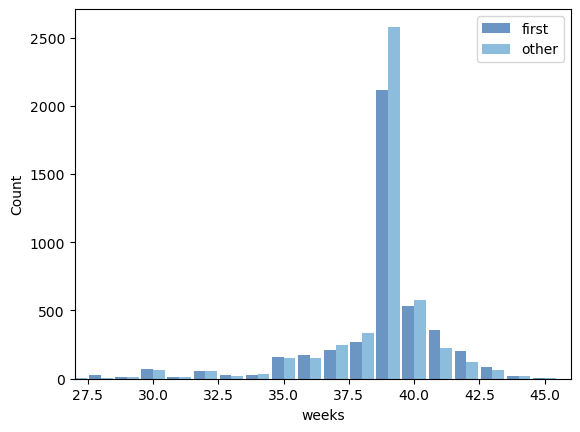

In [175]:
width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(other_hist, align='left', width=width)
thinkplot.Config(xlabel='weeks', ylabel='Count', xlim=[27, 46])

In [176]:
#Series provides methods to compute summary statistics:
mean = live.prglngth.mean()
var = live.prglngth.var()
std = live.prglngth.std()

In [177]:
mean, std

(38.56055968517709, 2.702343810070593)

In [178]:
# Here's are the mean pregnancy lengths for first babies and others:

# List item
# List item

In [179]:
firsts.prglngth.mean(), others.prglngth.mean()

(38.60095173351461, 38.52291446673706)

In [180]:
#Here's the difference (in weeks):
firsts.prglngth.mean() - others.prglngth.mean()

0.07803726677754952

In [181]:
# Distributions
# Summary statistics - mean, variance, median, etc. Dangerous because they obscure the data. 
# Alternative is to look at distributions of the data - describes how often each value appears.

# Distributions are usually represented as histograms (raw frequencies binned into equally spaced buckets). 
# Normalized histogram is called Probability Mass Function (PMF).

In [182]:
prglen_first_babies = firsts.prglngth
prglen_other_babies = others.prglngth

# setting up range of histogram and number of bins
first_baby_min_prglen = np.min(prglen_first_babies)
first_baby_max_prglen = np.max(prglen_first_babies)
other_baby_min_prglen = np.min(prglen_other_babies)
other_baby_max_prglen = np.max(prglen_other_babies)
print("first baby preg length min: %d, max: %d" % 
      (first_baby_min_prglen, first_baby_max_prglen))
print("other baby preg length min: %d, max: %d" % 
      (other_baby_min_prglen, other_baby_max_prglen))

bin_lb = min([first_baby_min_prglen, other_baby_min_prglen])
bin_ub = max([first_baby_max_prglen, other_baby_max_prglen])
nbr_bins = bin_ub - bin_lb
bin_range = (bin_lb, bin_ub)
print("range:", bin_range, "#-bins:", nbr_bins)

# building the histograms
first_baby_fdist = np.histogram(np.array(prglen_first_babies), bins=nbr_bins, range=bin_range)
other_baby_fdist = np.histogram(np.array(prglen_other_babies), bins=nbr_bins, range=bin_range)

first baby preg length min: 0, max: 48
other baby preg length min: 4, max: 50
range: (0, 50) #-bins: 50


In [183]:
def mode(fdist):
    """ takes a histogram and returns the most frequent value """
    mode_idx = np.argmax(fdist[0])
    return fdist[1][mode_idx]

def all_modes(fdist):
    """ takes a histogram and returns (value, freq) pairs in desc freq """
    mode_idxs = np.argsort(fdist[0])[::-1]
    vf_pairs = []
    for i in range(mode_idxs.shape[0]):
        vf_pairs.append((int(fdist[1][mode_idxs[i]]), fdist[0][mode_idxs[i]]))
    return vf_pairs


In [184]:

print("First baby arrival top week (mode): %d" % (mode(first_baby_fdist)))
print("Other baby arrival top week (mode): %d" % (mode(other_baby_fdist)))

print("First baby top 5 frequent weeks:", all_modes(first_baby_fdist)[0:5])
print("Other baby top 5 frequent weeks:", all_modes(other_baby_fdist)[0:5])


First baby arrival top week (mode): 39
Other baby arrival top week (mode): 39
First baby top 5 frequent weeks: [(39, 2114), (40, 536), (41, 360), (38, 272), (37, 208)]
Other baby top 5 frequent weeks: [(39, 2579), (40, 580), (38, 335), (37, 247), (41, 227)]


In [185]:
# Plotting Histograms
# From histogram below, it looks like until about week 41, other babies tend to arrive sooner in aggregate,
#but after that more first babies arrive. So there seems to be evidence that first babies do tend to arrive late.

# Other information from the plot:

# Mode - most common week for arrival seems to be 39 weeks.
# Shape - distribution is assymetric around the mode, drops of quicker to right than left.
#Possible reason is because surgical intervention happens for late pregnancies.
# Outliers - babies born at 30 weeks are probably just unusual, but may also reflect reporting errors.

In [186]:
def remaining_lifetime(pmf, age):
    """ Takes PMF and age and returns PMF of remaining lifetime """
    ages = pmf[1][:-1]
    idxs = np.where(ages >= age)[0]
    r_probs = pmf[0][idxs]
    r_ages = ages[idxs]
    # generate a fake population with r_probs and r_ages
    fake_pop_size = 1000
    fake_pop = []
    for i in range(r_ages.shape[0]):
        num_aged = int(r_probs[i] * fake_pop_size)
        for j in range(num_aged):
            fake_pop.append(r_ages[i])
    # create a histogram and return
    r_nbins = r_ages.shape[0]
    r_range = (np.min(r_ages), np.max(r_ages))
    return np.histogram(np.array(fake_pop), bins=r_nbins, range=r_range)




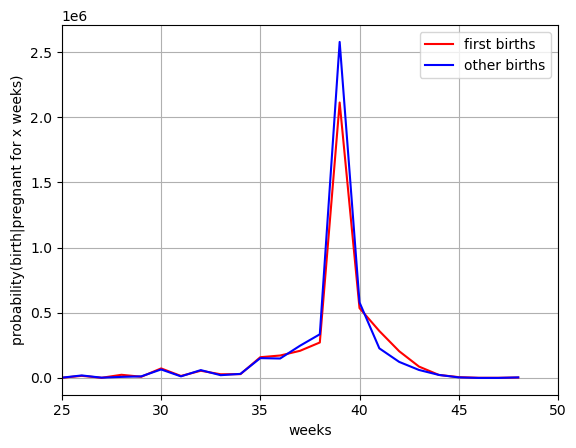

In [187]:
# compute PMFs for each distribution
pmf_first_babies = np.histogram(prglen_first_babies, 
                                bins=nbr_bins, range=bin_range)
pmf_other_babies = np.histogram(prglen_other_babies, 
                                bins=nbr_bins, range=bin_range)


def cond_prob(pmf, x):
    """ Returns probability that birth will occur at week x given person 
        is pregnant at week x """
    return remaining_lifetime(pmf, x)[0][0]

first_birth_probs = []
other_birth_probs = []
for x in range(0, 49):
    first_birth_probs.append(cond_prob(pmf_first_babies, x))
    other_birth_probs.append(cond_prob(pmf_other_babies, x))

plt.plot(range(len(first_birth_probs)), first_birth_probs, color='r', label="first births")
plt.plot(range(len(first_birth_probs)), other_birth_probs, color='b', label="other births")

plt.ylabel("probability(birth|pregnant for x weeks)")
plt.xlabel("weeks")
plt.xlim([25, 50])
plt.legend(loc="best")
plt.grid()
plt.show()

In [188]:
# The chart indicates that a first baby is less likely to be born until about week 42, after which they are more likely to be born than other babies.

In [189]:
# Reporting Results
# The evidence clearly indicates that first babies tend to arrive later than others.

In [190]:
# Exercise 4: Page 25: 2-4
#Using the variable totalwgt_lb, investigate whether first babies are lighter or heavier than others.

#Compute Cohen’s effect size to quantify the difference between the groups. How does it compare to the difference in pregnancy length?

In [191]:
# Compute the Cohen effect size for the difference in pregnancy length for first babies and others.
# The Cohen's Effect Size measures the magnitude of the difference between two groups.

In [192]:
#This functon computes the Cohen effect size, which is the difference in means expressed in number of standard deviations:

In [193]:
def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

In [194]:
# mean1, mean2: Compute the means of the two groups.
# std1, std2: Compute the standard deviations of the two groups (with ddof=1 for sample standard deviation).
# pooled_std: Calculate the pooled standard deviation using the formula.
# d: Compute Cohen's 
# d by dividing the difference in means by the pooled standard deviation.

# Interpretation of Cohen’s 
# d=0.2: Small effect size
# d=0.5: Medium effect size
# d=0.8: Large effect size

In [195]:
# Solution
# Find the mean of total weight of the first and other babies in lb

firsts.totalwgt_lb.mean(), others.totalwgt_lb.mean()

(7.201094430437772, 7.325855614973262)

In [196]:
# Find the Cohen'd effect size

CohenEffectSize(firsts.totalwgt_lb, others.totalwgt_lb)

-0.088672927072602

In [197]:
# Conclusion: A Cohen's d of 
# -0.088672927072602 suggests a very small difference between the firsts and other babies group, with the other babiess group being slightly higher.
# A negative indicates that the mean of the other babies total wt group is higher than the mean of the first total wt group.



In [198]:
# How does it compare to the difference in pregnancy length?

In [199]:
# Solution
firsts.prglngth.mean(), others.prglngth.mean()


(38.60095173351461, 38.52291446673706)

In [200]:
CohenEffectSize(firsts.prglngth, others.prglngth)

0.028879044654449883

In [201]:
# Conclusion: A Cohen's d of 

# d=0.028879044654449883 falls well within the small effect size range and is very close to zero, it indicates almost no meaningful difference between the two groups.
# A positive d means the mean of prglngth of first group  is slightly higher than the mean of prglngth of others group.